<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/stock_data.csv', index_col ='Date')
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")             

In [3]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]['Close']

In [4]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs
def get_d_term(data):
  return ndiffs(data.values, test='adf')  

In [5]:
get_d_term(stock['AAPL'])

1

In [6]:
get_d_term(stock['FB'])

1

In [7]:
get_d_term(stock['MSFT'])

1

In [8]:
get_d_term(stock['TSLA'])

1

In [9]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':120})

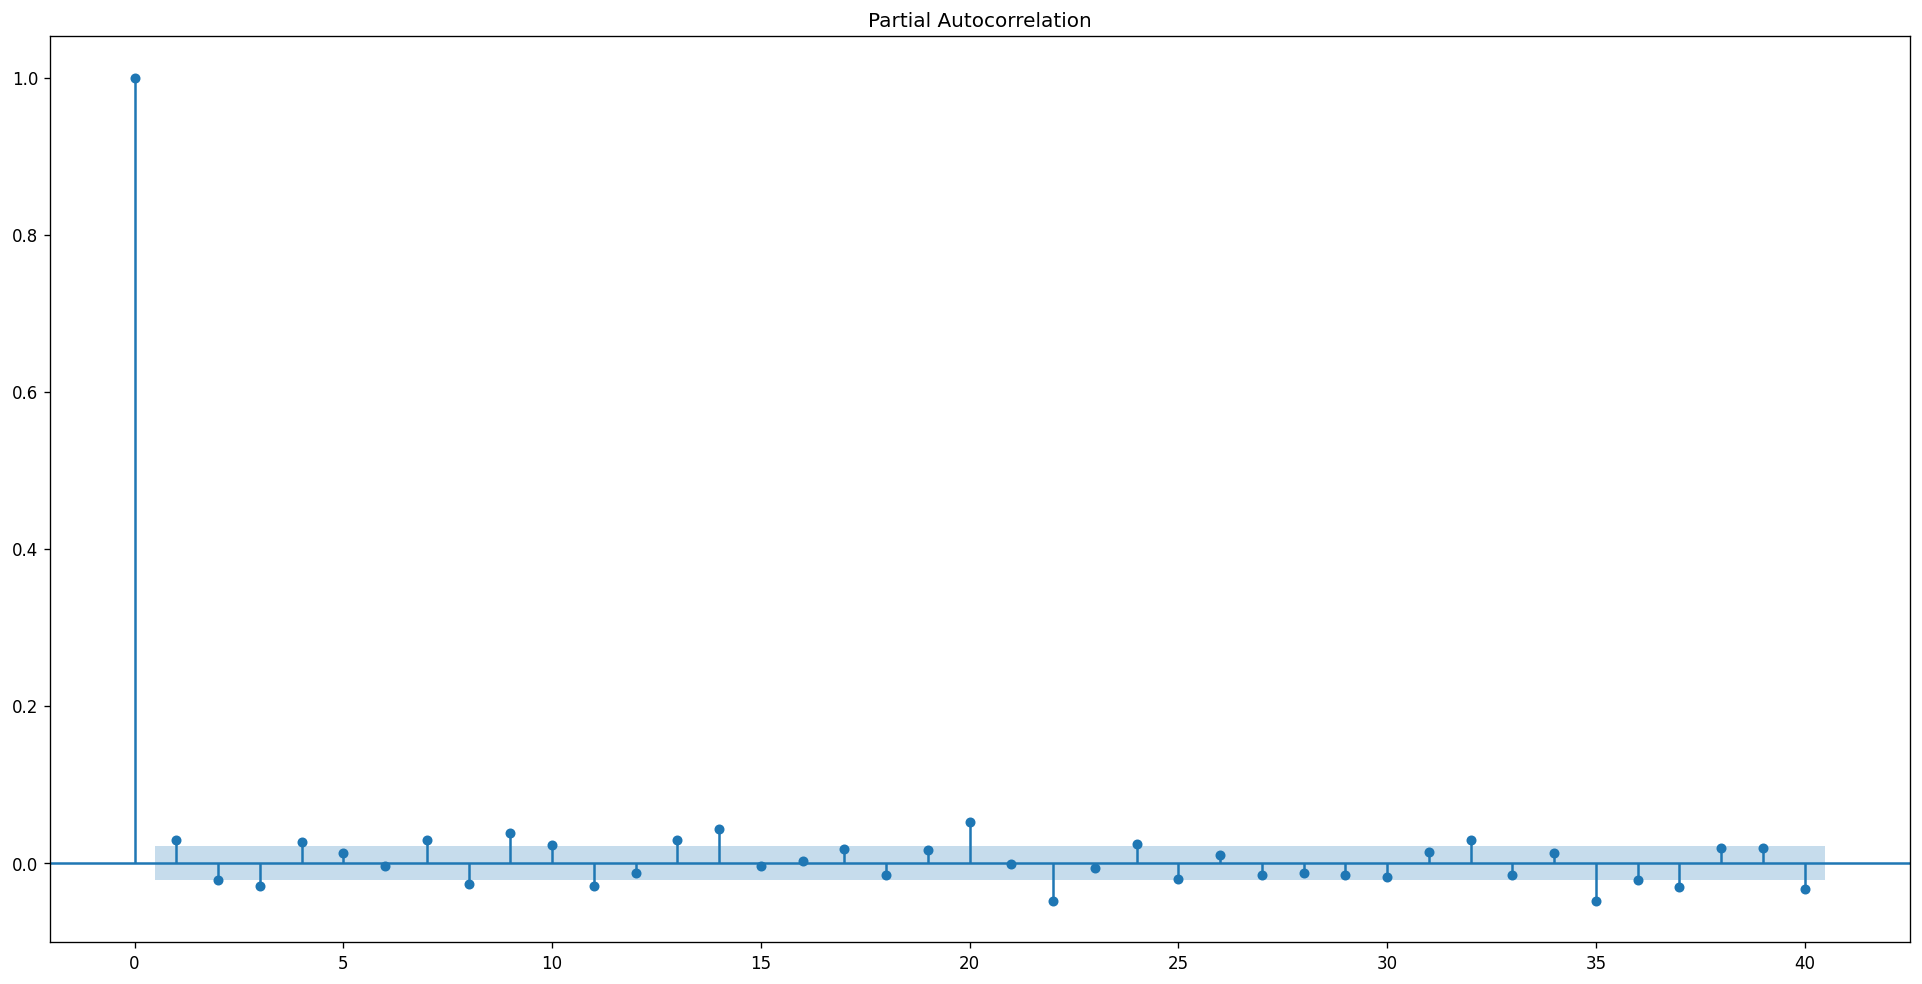

In [10]:
plot_pacf(stock['AAPL'].diff().dropna());

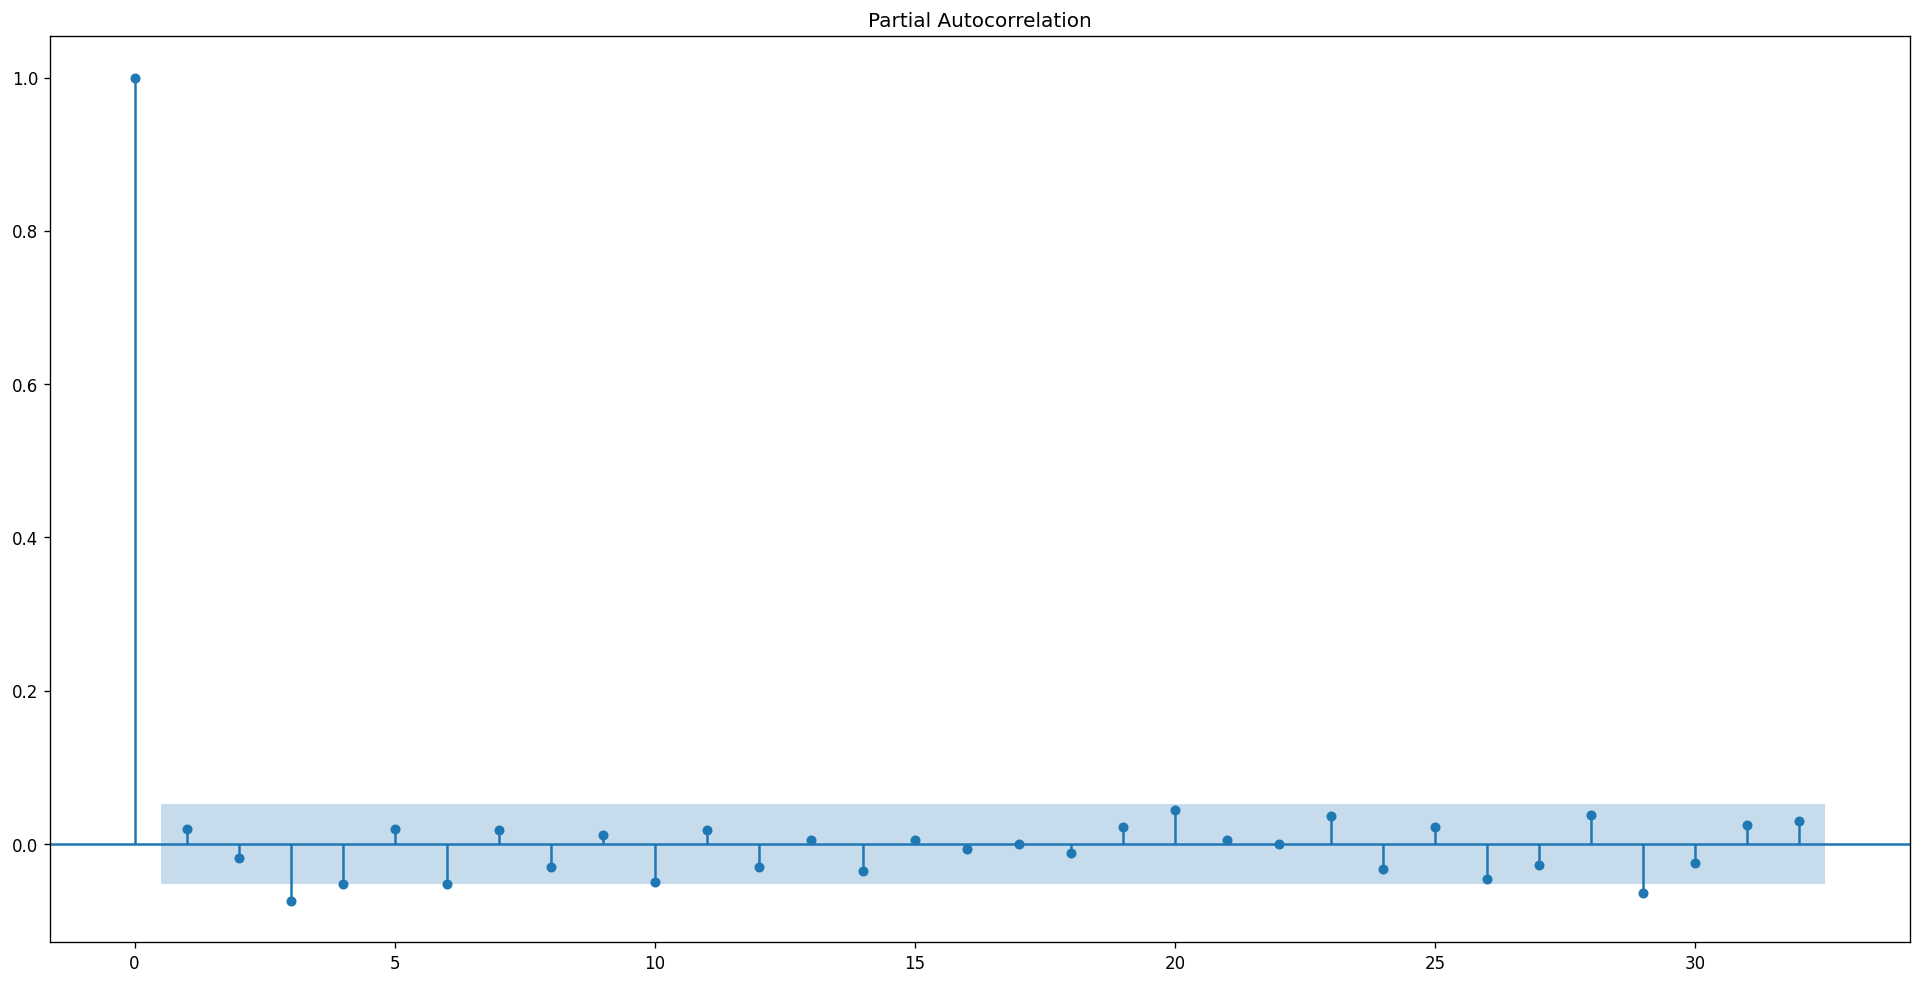

In [11]:
plot_pacf(stock['FB'].diff().dropna());

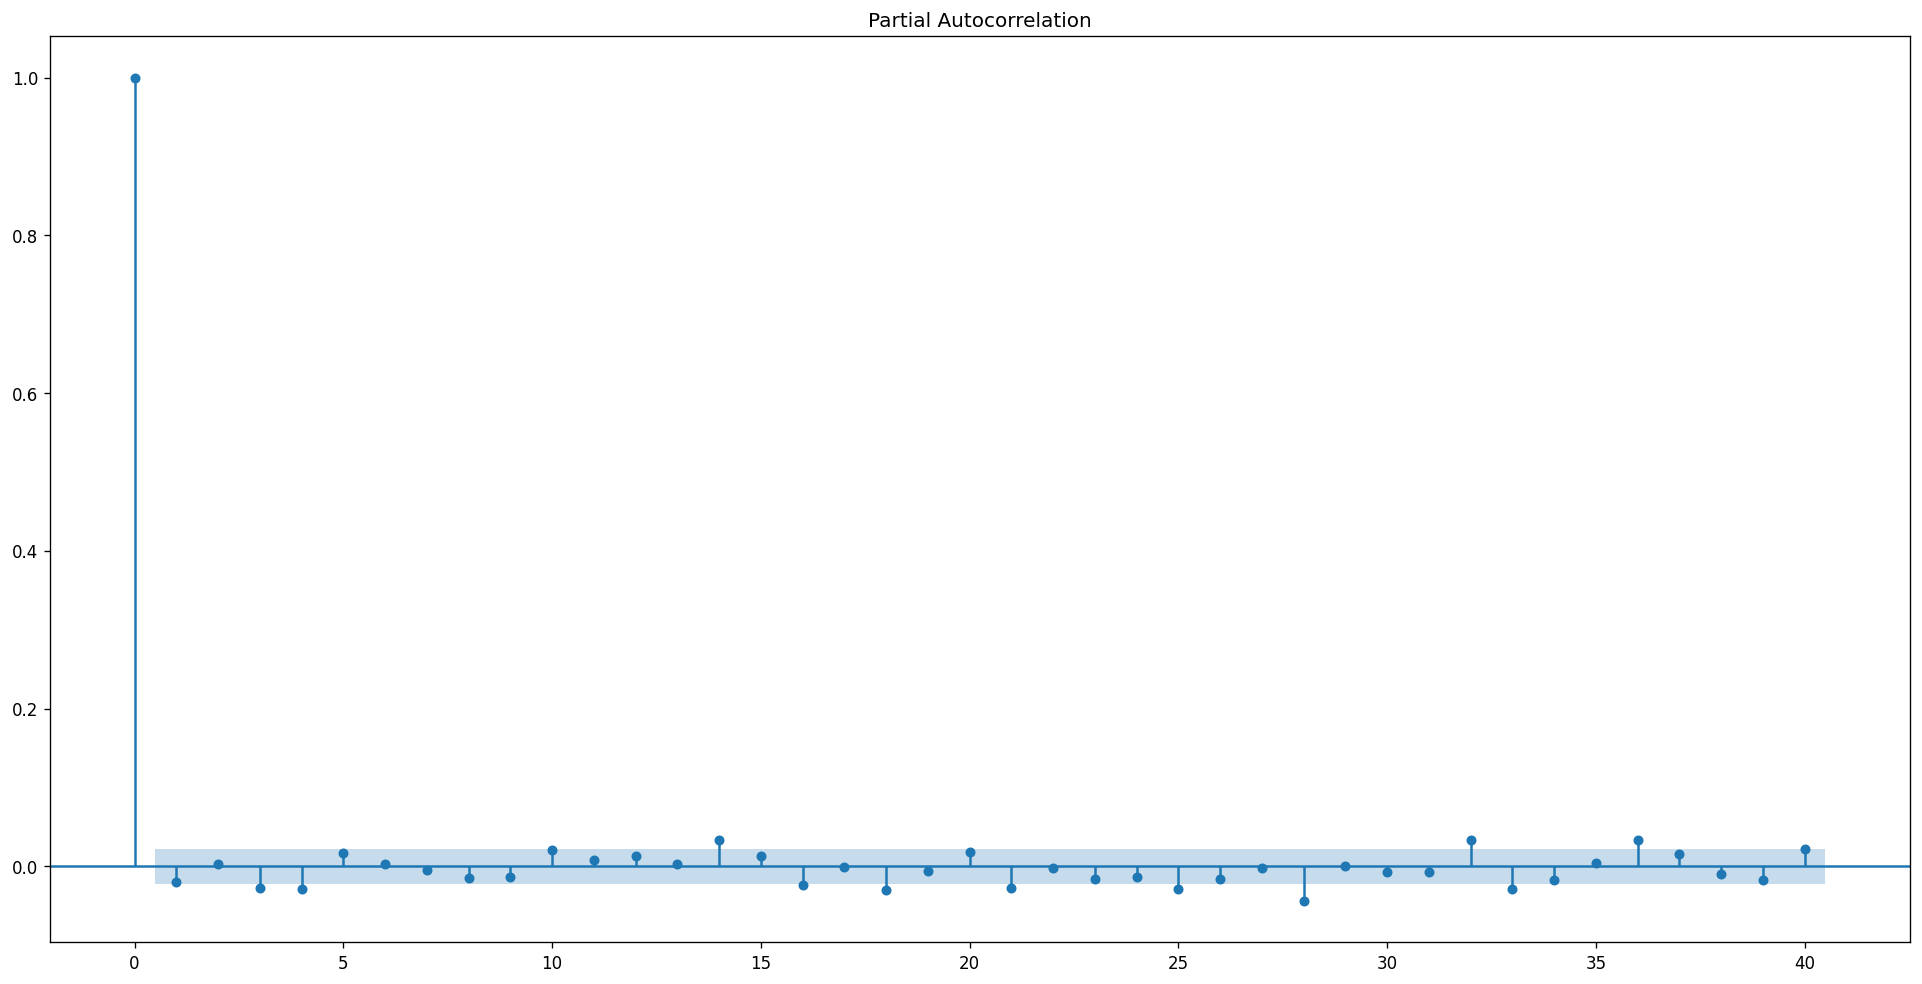

In [12]:
plot_pacf(stock['MSFT'].diff().dropna());

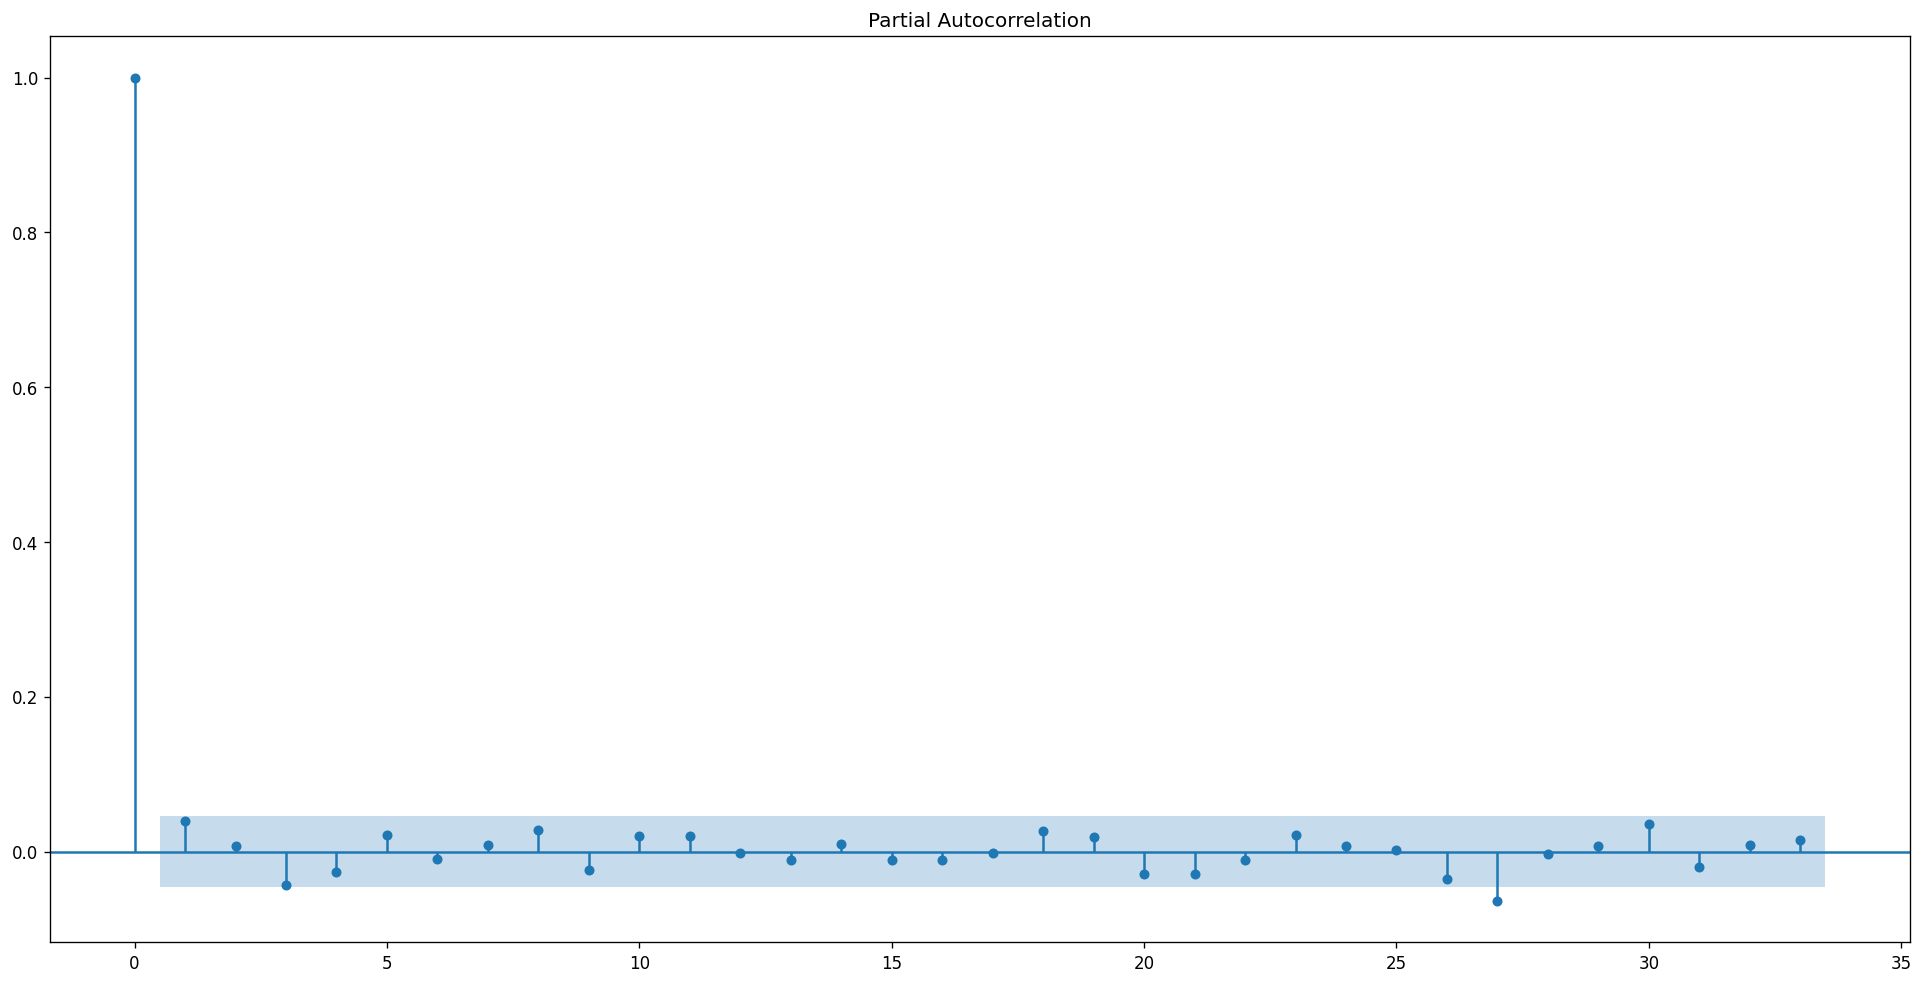

In [13]:
plot_pacf(stock['TSLA'].diff().dropna());

In [14]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [15]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [16]:
def CreateModel(train_data, test_data):
  train_ar = train_data.values
  test_ar = test_data.values
  history = [x for x in train_ar]
  predictions = list()
  for t in range(len(test_ar)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
  return model_fit, predictions

In [39]:
def Predictions_Plot(data, train_data, test_data, predictions):
  plt.figure(figsize=(20,10))
  plt.plot(data, 'green', color='blue', label='Training Data')
  plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
           label='Predicted Price')
  plt.plot(test_data.index, test_data, color='red', label='Actual Price')
  plt.title('Prices Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend()

In [18]:
MSFT_Model,MSFT_Model_predictions=CreateModel(MSFT_train, MSFT_test)

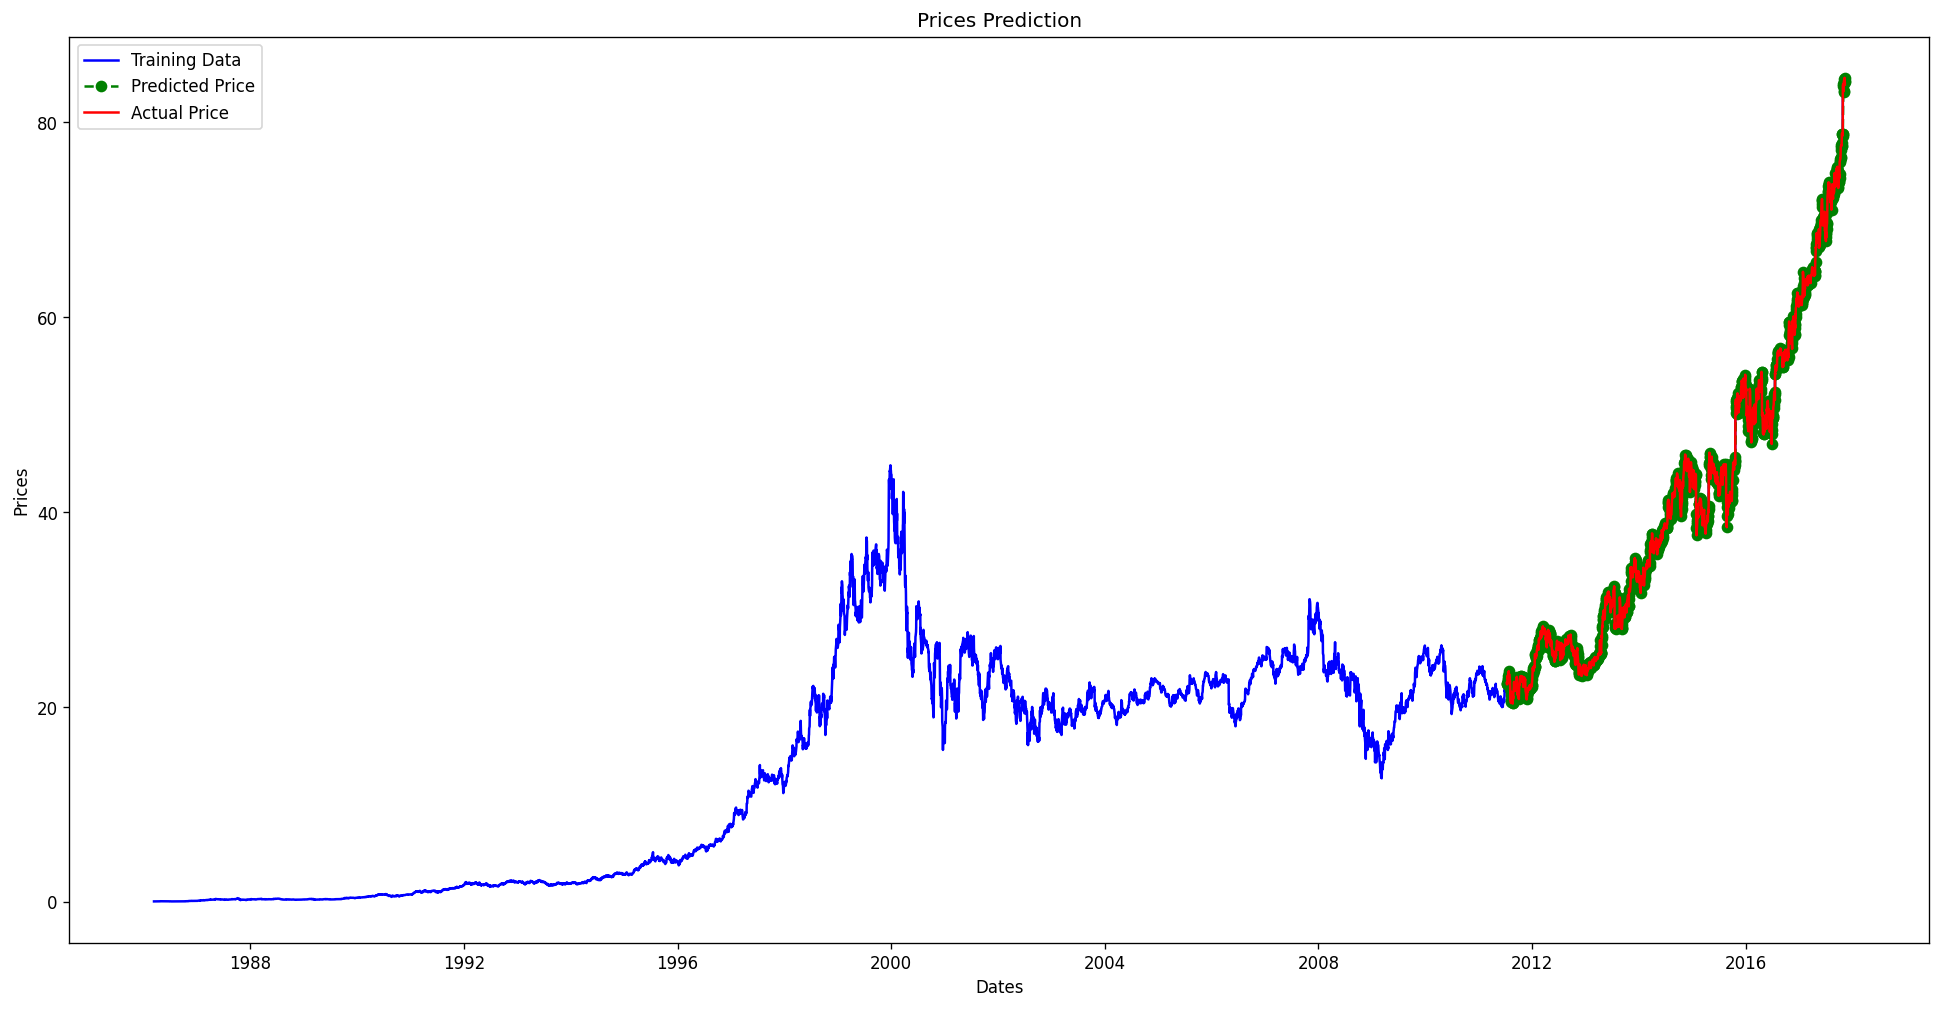

In [40]:
Predictions_Plot(stock['MSFT'],MSFT_train,MSFT_test,MSFT_Model_predictions)

In [20]:
AAPL_Model,AAPL_Model_predictions=CreateModel(AAPL_train, AAPL_test)

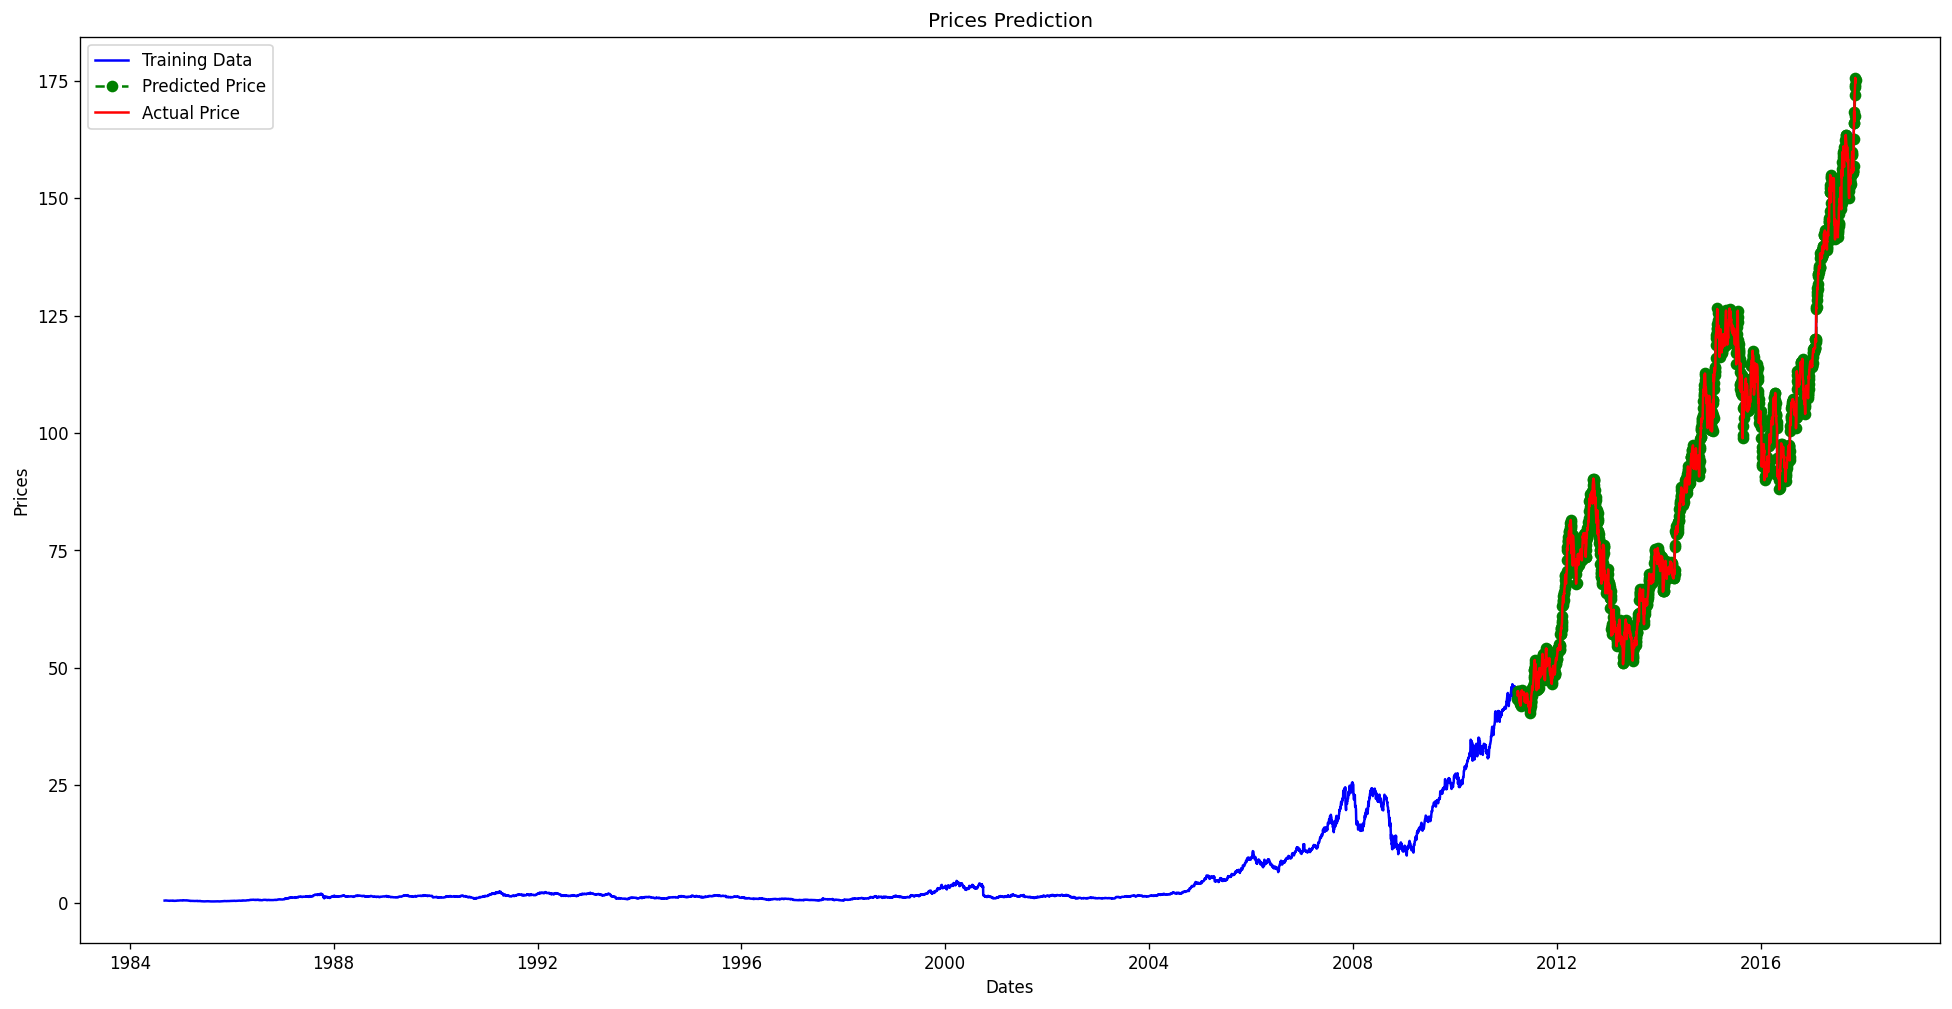

In [41]:
Predictions_Plot(stock['AAPL'],AAPL_train,AAPL_test,AAPL_Model_predictions)

In [22]:
FB_Model,FB_Model_predictions=CreateModel(FB_train, FB_test)

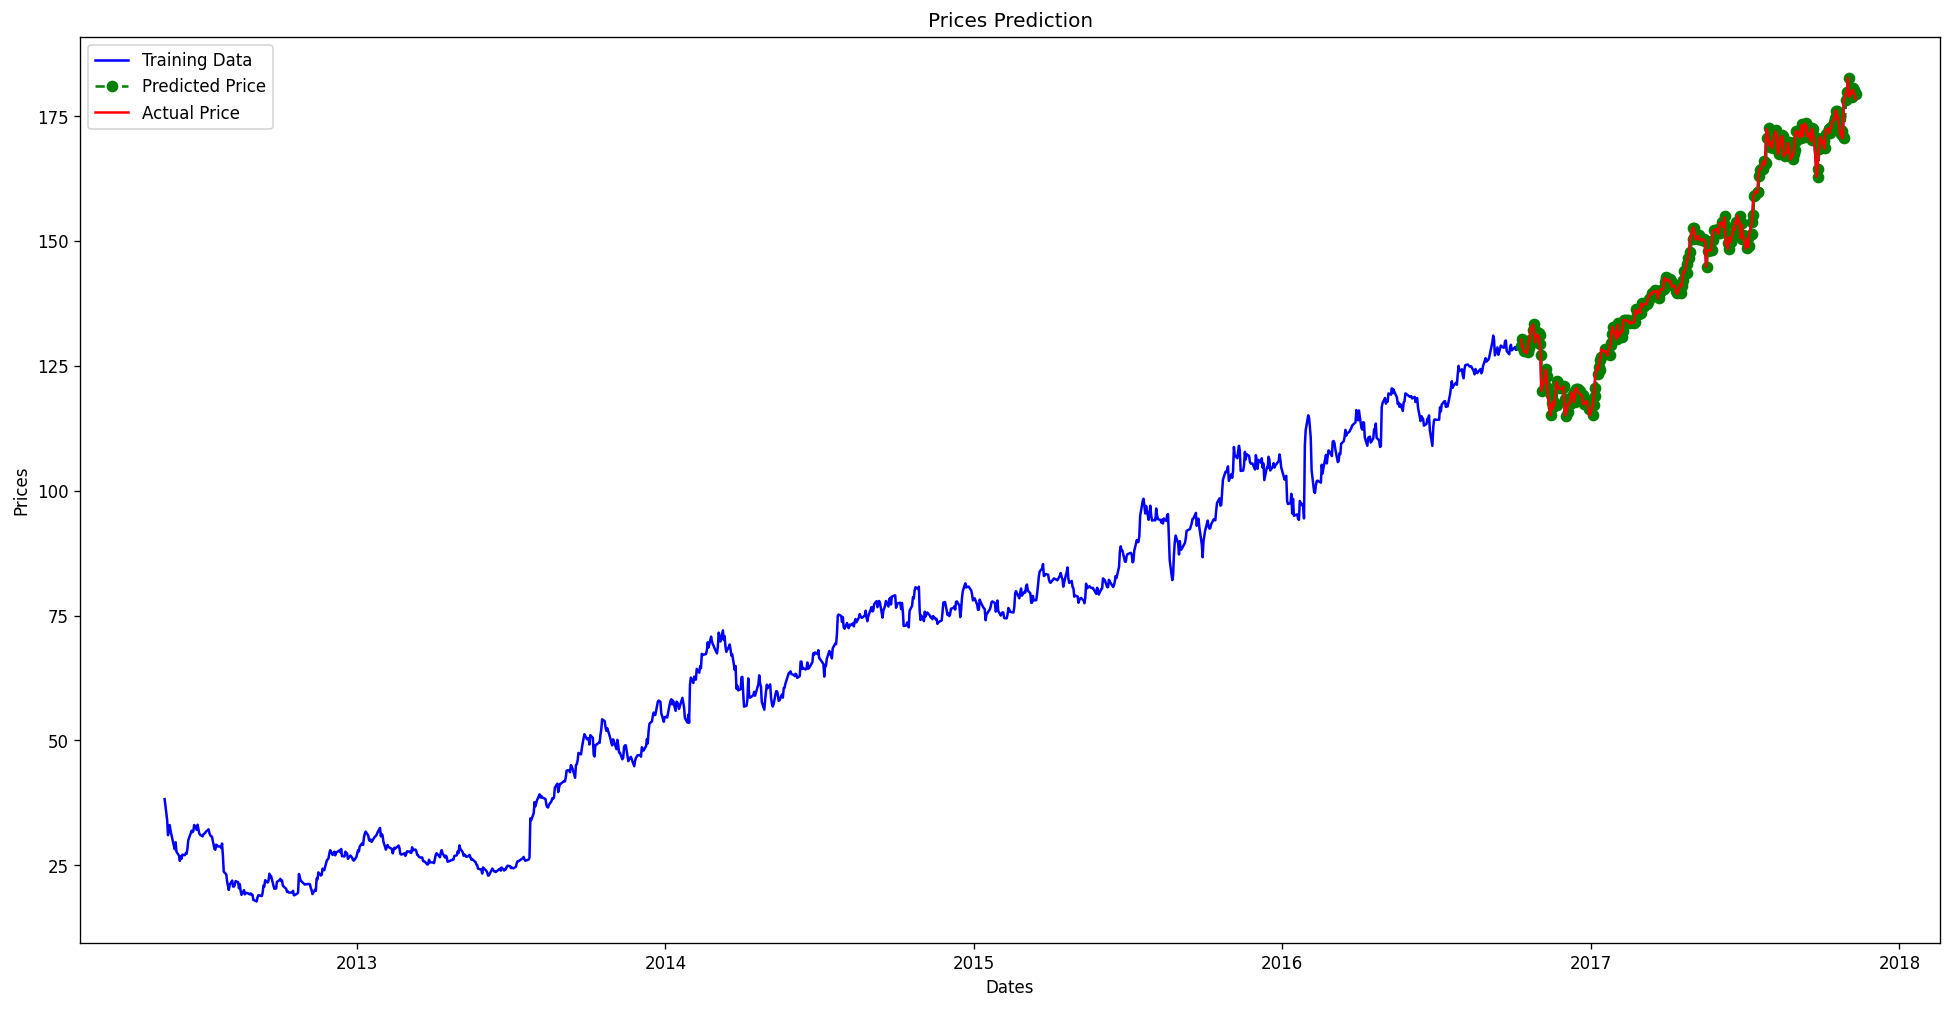

In [42]:
Predictions_Plot(stock['FB'],FB_train,FB_test,FB_Model_predictions)

In [24]:
TSLA_Model,TSLA_Model_predictions=CreateModel(TSLA_train, TSLA_test)

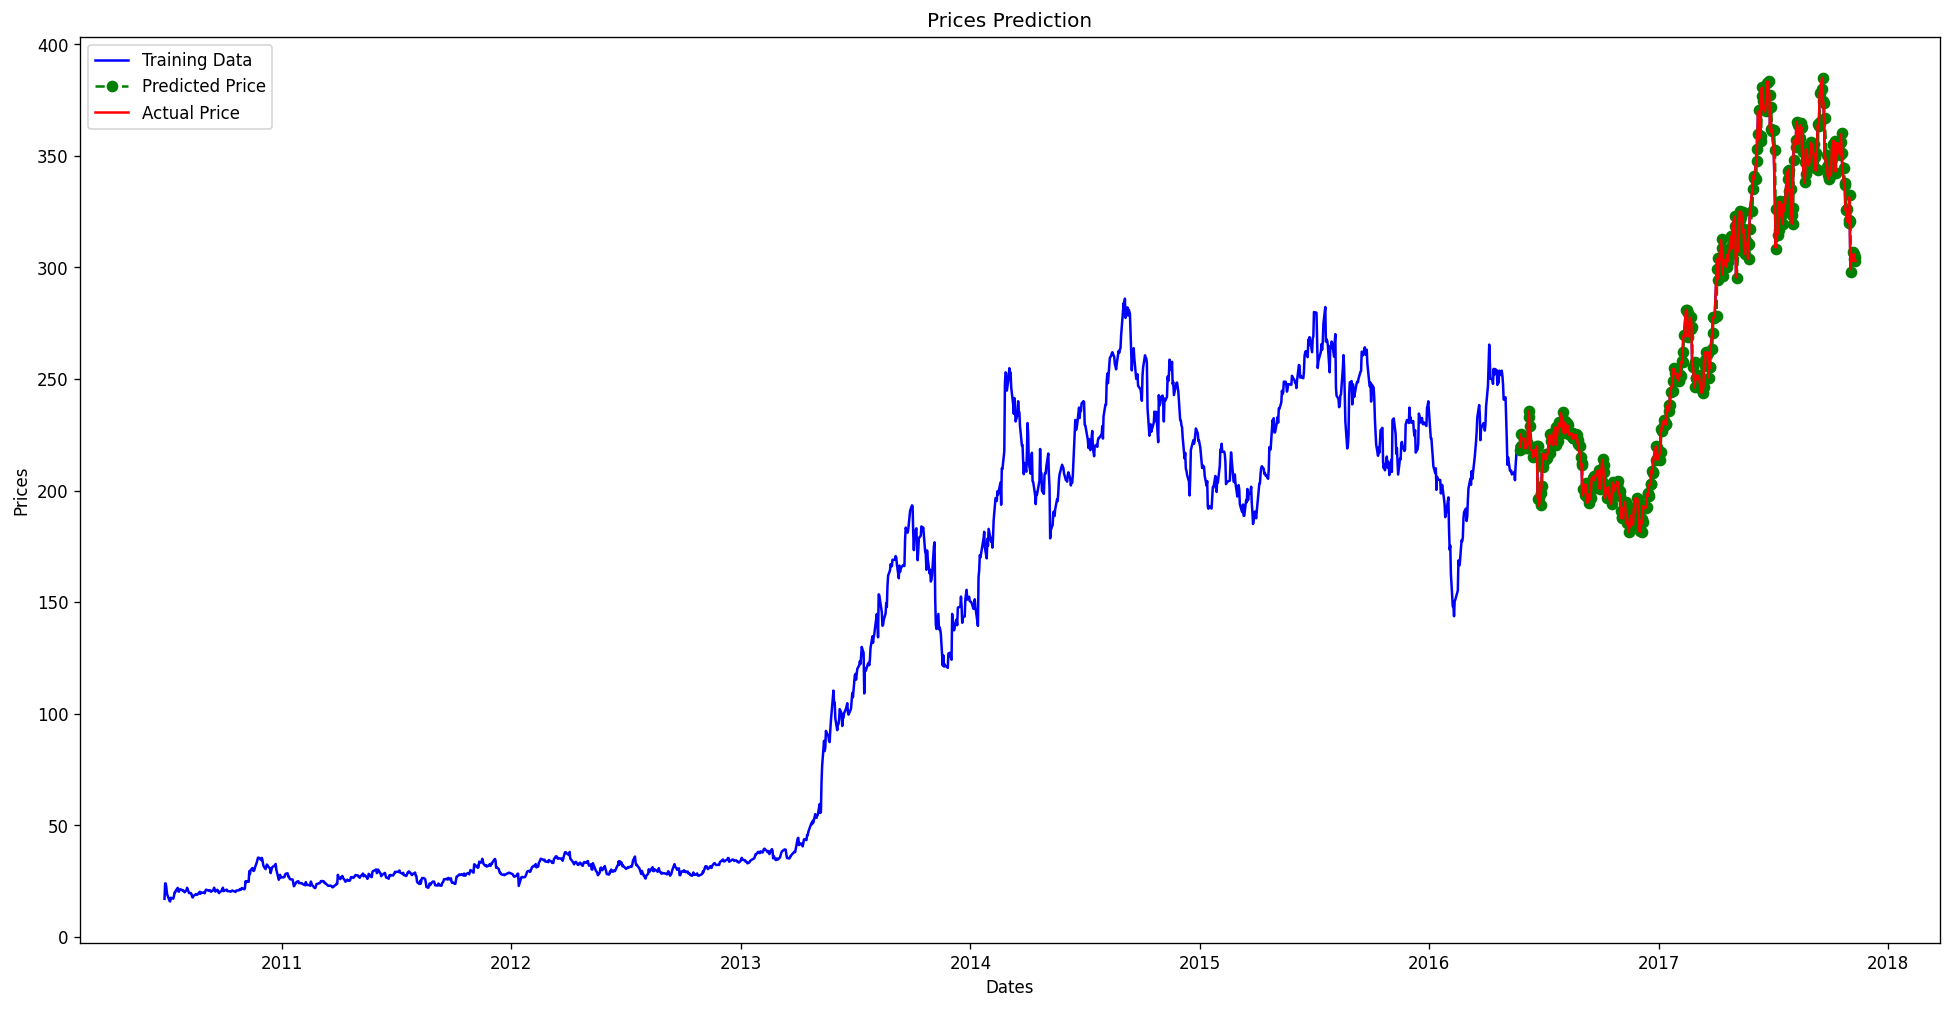

In [43]:
Predictions_Plot(stock['TSLA'],TSLA_train,TSLA_test,TSLA_Model_predictions)

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#RMSE
def RMSE(test_data,model_predictions):
  rmse=sqrt(mean_squared_error(test_data.values,model_predictions))
  return rmse

In [27]:
AAPL_RMSE=RMSE(AAPL_test,AAPL_Model_predictions)
AAPL_RMSE

1.3989424846874041

In [28]:
FB_RMSE=RMSE(FB_test,FB_Model_predictions)
FB_RMSE

1.6887118724637569

In [29]:
MSFT_RMSE=RMSE(MSFT_test,MSFT_Model_predictions)
MSFT_RMSE

0.5799965911464976

In [30]:
TSLA_RMSE=RMSE(TSLA_test,TSLA_Model_predictions)
TSLA_RMSE

6.144763588870521

In [31]:
def MAPE(test_data, model_predictions):
    prediction_arr=np.array(model_predictions)
    mape = np.mean(np.abs(prediction_arr - test_data.values)/np.abs(test_data.values))
    return mape

In [32]:
AAPL_MAPE=MAPE(AAPL_test,AAPL_Model_predictions)
AAPL_MAPE

0.439125562872082

In [33]:
FB_MAPE=MAPE(FB_test,FB_Model_predictions)
FB_MAPE

0.15372048947671288

In [34]:
TSLA_MAPE=MAPE(TSLA_test,TSLA_Model_predictions)
TSLA_MAPE

0.27214827806976716

In [35]:
MSFT_MAPE=MAPE(MSFT_test,MSFT_Model_predictions)
MSFT_MAPE

0.459809121807418

In [36]:
evaluate = pd.DataFrame({'AAPL': [AAPL_RMSE,AAPL_MAPE]},index=["RMSE", "MAPE"])
evaluate.insert(0, 'TSLA', [TSLA_RMSE,TSLA_MAPE])
evaluate.insert(0, 'MSFT', [MSFT_RMSE,MSFT_MAPE])
evaluate.insert(0, 'FB', [FB_RMSE,FB_MAPE])

In [37]:
evaluate

,FB,MSFT,TSLA,AAPL
RMSE,1.688712,0.579997,6.144764,1.398942
MAPE,0.153720,0.459809,0.272148,0.439126


In [38]:
evaluate.to_csv("ARIMA_evaluate.csv")